**Table of contents**<a id='toc0_'></a>    
- 1. [Imports](#toc1_)    
- 2. [Model class](#toc2_)    
  - 2.1. [Basic Edgeworth box](#toc2_1_)    

<!-- vscode-jupyter-toc-config
	numbering=true
	anchor=true
	flat=false
	minLevel=2
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

## 1. <a id='toc1_'></a>[Imports](#toc0_)

In [1]:
import matplotlib.pyplot as plt
plt.rcParams.update({"axes.grid":True,"grid.color":"black","grid.alpha":"0.25","grid.linestyle":"--"})
plt.rcParams.update({'font.size': 14})

%load_ext autoreload
%autoreload 2

## 2. <a id='toc2_'></a>[Model class](#toc0_)

In [2]:
from ExchangeEconomy import ExchangeEconomyClass
import numpy as np

### 2.1. <a id='toc2_1_'></a>[Basic Edgeworth box](#toc0_)

In [3]:
model = ExchangeEconomyClass()

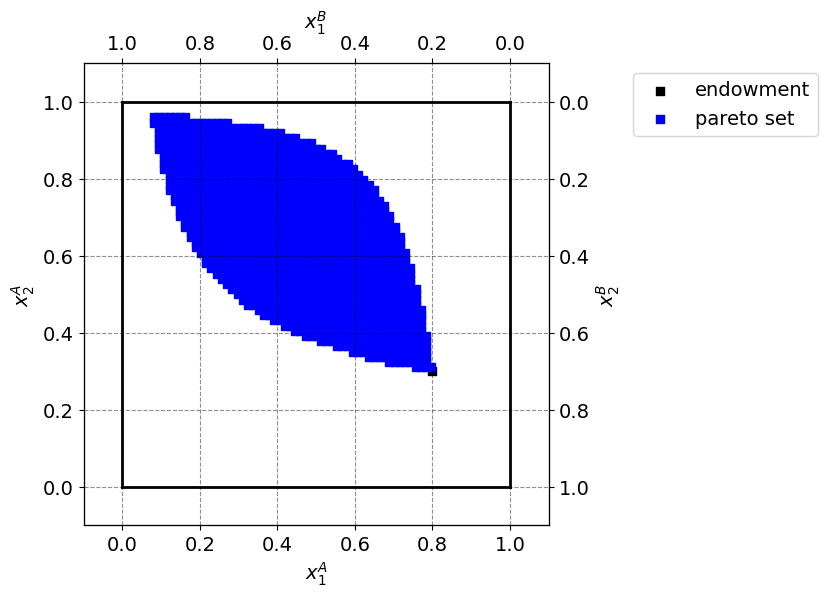

In [4]:
par = model.par
x1a_vec, x2a_vec = model.solve_discrete()

# a. total endowment
w1bar = 1.0
w2bar = 1.0

# b. figure set up
fig = plt.figure(frameon=False,figsize=(6,6), dpi=100)
ax_A = fig.add_subplot(1, 1, 1)

ax_A.set_xlabel("$x_1^A$")
ax_A.set_ylabel("$x_2^A$")

temp = ax_A.twinx()
temp.set_ylabel("$x_2^B$")
ax_B = temp.twiny()
ax_B.set_xlabel("$x_1^B$")
ax_B.invert_xaxis()
ax_B.invert_yaxis()

# A
ax_A.scatter(par.w1A,par.w2A,marker='s',color='black',label='endowment')

# Add pareto-optiaml point of person A

ax_A.scatter(x1a_vec,x2a_vec,marker='s', color='blue', label='pareto set')

# limits
ax_A.plot([0,w1bar],[0,0],lw=2,color='black')
ax_A.plot([0,w1bar],[w2bar,w2bar],lw=2,color='black')
ax_A.plot([0,0],[0,w2bar],lw=2,color='black')
ax_A.plot([w1bar,w1bar],[0,w2bar],lw=2,color='black')

ax_A.set_xlim([-0.1, w1bar + 0.1])
ax_A.set_ylim([-0.1, w2bar + 0.1])    
ax_B.set_xlim([w1bar + 0.1, -0.1])
ax_B.set_ylim([w2bar + 0.1, -0.1])

ax_A.legend(frameon=True,loc='upper right',bbox_to_anchor=(1.6,1.0));

### 2.2. <a id='toc2_2_'></a>[Q2](#toc0_)

In [8]:
p1 = 0.5 + (2*np.arange(76)/75)

eps1_vec = []
eps2_vec = []

for p in p1:

    eps1, eps2 = model.check_market_clearing(p)

    eps1_vec.append(eps1)
    eps2_vec.append(eps2)
    

print(eps1_vec, eps2_vec)

len(eps2_vec)



[0.533333333333333, 0.47594936708860747, 0.42409638554216855, 0.3770114942528735, 0.33406593406593377, 0.2947368421052629, 0.2585858585858586, 0.22524271844660193, 0.19439252336448576, 0.16576576576576557, 0.13913043478260856, 0.11428571428571421, 0.09105691056910548, 0.06929133858267705, 0.048854961832061006, 0.029629629629629395, 0.011510791366906414, -0.00559440559440566, -0.021768707482993255, -0.037086092715232055, -0.05161290322580642, -0.06540880503144664, -0.07852760736196335, -0.09101796407185642, -0.1029239766081873, -0.11428571428571432, -0.12513966480446936, -0.13551912568306013, -0.14545454545454545, -0.15497382198952886, -0.16410256410256419, -0.17286432160804022, -0.18128078817734006, -0.1893719806763286, -0.19715639810426555, -0.20465116279069773, -0.21187214611872152, -0.2188340807174889, -0.22555066079295166, -0.2320346320346321, -0.23829787234042554, -0.2443514644351465, -0.2502057613168725, -0.2558704453441297, -0.2613545816733069, -0.2666666666666668, -0.2718146718

76